<a href="https://colab.research.google.com/github/basketbob/ML/blob/main/netology_DS/mds24_HWX_KuzinVS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

###Задание 1

Вычислите производную функции:

In [ ]:
def funct(x):
  return sym.tan(sym.sin(x) + sym.cos(2 * x + 3))**2

x = sym.Symbol('x')
y = sym.diff(funct(x)).evalf(subs={'x':1})
print(y)

55.3859176353379


###Задание 2
Дан объект в 2D пространстве.

При помощи матричных операций выполните:

Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)

(-200.0, 200.0)

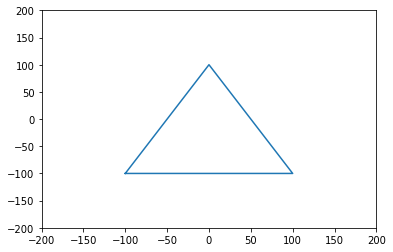

In [ ]:
A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

(0.0, 500.0)

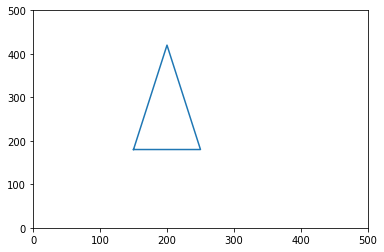

In [ ]:
x2 = np.dot(0.5, x)
y2 = np.dot(1.2, y)

x2 += 200
y2 += 300

plt.plot(x2, y2)
plt.ylim([0, 500])
plt.xlim([0, 500])

###Задание 3
Найдите собственные значения и собственные вектора матрицы:

In [ ]:
from numpy import linalg as LA

m = np.array([[1, 4], [1, 1]])
print('m = ', m)
print()

w,v = LA.eig(m)
print('w = ', w)
print()
print('v = ', v)

m =  [[1 4]
 [1 1]]

w =  [ 3. -1.]

v =  [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


###Задание 4
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

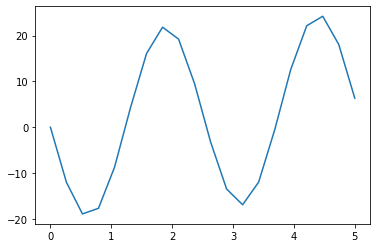

In [ ]:
def f(x, a, b):
  return np.e**a * np.sin(b*x) + x

x = np.array([0., 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.])

fx = np.array([0., -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

plt.plot(x, fx)
plt.show()

     fun: 0.043631576926070004
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 152
  status: 1
 success: True
       x: array([ 3.0000271 , -2.49993557])


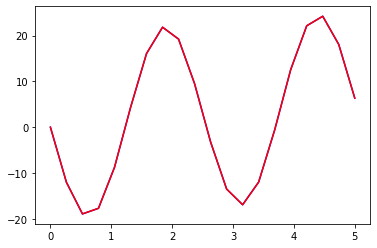

In [ ]:
def error(params):
  return np.sum(np.abs(fx - f(x, params[0], params[1])))

x0 = [0,0]

result_m = minimize(error, x0,  method='COBYLA')
print(result_m)

plt.plot(x, fx, color='blue')
plt.plot(x, f(x, result_m.x[0], result_m.x[1]), color='red')
plt.show()

###Задание 5
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [ ]:
from sklearn.metrics import pairwise_distances

raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

res = pairwise_distances(raitings, metric='cosine')
res

array([[0.        , 0.17397081, 0.15078471, 0.21659884, 0.18082368,
        0.25881452, 0.27264172, 0.19032478, 0.08934018, 0.13989224],
       [0.17397081, 0.        , 0.18765675, 0.15364663, 0.12861948,
        0.17286893, 0.17370316, 0.19973997, 0.17473692, 0.18031873],
       [0.15078471, 0.18765675, 0.        , 0.15330626, 0.21605701,
        0.20902015, 0.32383777, 0.23710448, 0.17887923, 0.08126949],
       [0.21659884, 0.15364663, 0.15330626, 0.        , 0.30846591,
        0.21334208, 0.16725789, 0.17065333, 0.2229334 , 0.1411313 ],
       [0.18082368, 0.12861948, 0.21605701, 0.30846591, 0.        ,
        0.2235566 , 0.21799532, 0.18763131, 0.12051523, 0.15425211],
       [0.25881452, 0.17286893, 0.20902015, 0.21334208, 0.2235566 ,
        0.        , 0.25988199, 0.15548315, 0.19377124, 0.14485092],
       [0.27264172, 0.17370316, 0.32383777, 0.16725789, 0.21799532,
        0.25988199, 0.        , 0.17330826, 0.18869956, 0.20845282],
       [0.19032478, 0.19973997, 0.2371044

In [ ]:
x_num = 1
for row in res:
  i = 1
  min = 1
  for val in row:
    if val > 0:
      if min > val:
        min = val
        y_num = i

    i += 1

  print(x_num, 'похож на ', y_num)

  x_num += 1

1 похож на  9
2 похож на  5
3 похож на  10
4 похож на  10
5 похож на  9
6 похож на  10
7 похож на  4
8 похож на  6
9 похож на  1
10 похож на  3
